In [30]:
from math import sqrt
import matplotlib.pyplot as plt

In [31]:
with open("bonjour_5_15.csv", 'r') as f:
    raw_data = f.readlines()

data = []

for i in raw_data :
    x,y = i.split(",")
    
    data.append([float(x), float(y)])

In [32]:
def distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [33]:
centers = [[min(point[0] for point in data), min(point[1] for point in data)],[max(point[0] for point in data), max(point[1] for point in data)]]

In [34]:
def k_means(data, centers, n=100):
    n_points = len(data)
    n_clusters = len(centers)
    
    labels = [0] * n_points
    
    for _ in range(n):
        # update labels
        new_labels = []
        for i in range(n_points):
            # compute all distances, attribute new centers
            distances = [distance(data[i], center) for center in centers]
            new_labels.append(distances.index(min(distances)))

        # update clusters
        new_centers = []
        for k in range(n_clusters):
            cluster_points = [data[i] for i in range(n_points) if new_labels[i] == k]
            if cluster_points != []: # for not empty clusters
                mean_x = sum(point[0] for point in cluster_points) / len(cluster_points)
                mean_y = sum(point[1] for point in cluster_points) / len(cluster_points)
                new_centers.append([mean_x, mean_y])

            else: # for empty clusters
                new_centers.append(centers[k])
        
        # check for convergence
        if new_centers == centers:
            break
        centers = new_centers
        labels = new_labels

    return centers, labels

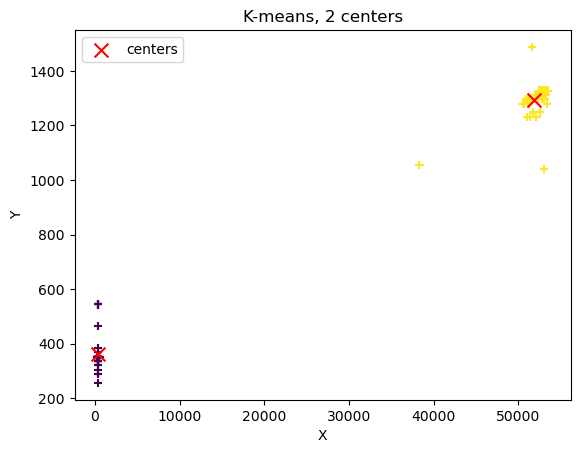

In [35]:
centers, labels = k_means(data, centers, n=5000)

plt.scatter([point[0] for point in data], [point[1] for point in data], c=labels, cmap='viridis', marker='+')
plt.scatter([center[0] for center in centers], [center[1] for center in centers], c='red', marker='x', s=100, label='centers')
plt.title("K-means, 2 centers")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [36]:
string = ""

for i in labels:
    string += str(i)

string

'0000000111000000000011100000011111111111100011111111100000011100011100000011111111111111100011100011111100000011100000000'